# **TP 1: Initiation à la manipulation d’images numériques**

**Nom & Prénom** :

*  Imad Anis KHEFFACHE



**Spécialité** :  Data Science & Intelligence Artificielle

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cmath
import os
from google.colab.patches import cv2_imshow

# **Manipulation 1:**

1/ Création des matrices:

In [53]:
A=[]
for x in range(0,64):
    A=A+[4*x]
B=[0, 0, 0, 0, 0, 0, 0, 0]
C=[0, 0, 1, 1, 1, 1, 0, 0]


I1=[]
for x in range(0,65):
  I1=I1+[A]
I1=np.array(I1)
print(I1)

I2=[]
I2=[B, B, C, C, C, C, B, B]
I2=np.array(I2)
print(I2)

I3=[]
I3=[[I2, I2], [I2, I2]]
I3=np.tile(I2,(2,2))
print(I3)

[[  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 ...
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Affichage avec la fonction plt.imshow():

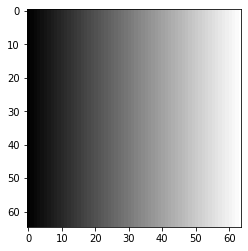

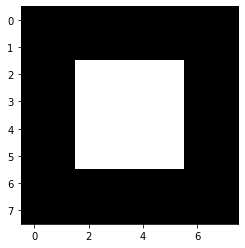

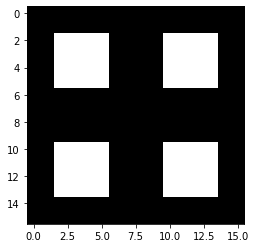

In [54]:
I1=np.uint8(I1)
I2=np.uint8(I2)
I3=np.uint8(I3)

plt.imshow(I1, cmap='gray')
plt.show()

plt.imshow(I2, cmap='gray')
plt.show()

plt.imshow(I3, cmap='gray')
plt.show()

Affichage avec cv2_imshow():


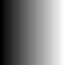

In [55]:
#Dans Google Collab, la fonction cv.imshow() ne fonctionne pas correctement, donc on aura besoin de la fonction cv2_imshow from google.colab.patches

cv2_imshow(I1)
cv.waitKey(0)
cv.destroyAllWindows()

cv2_imshow(I2)
cv.waitKey(0)
cv.destroyAllWindows()

cv2_imshow(I3)
cv.waitKey(0)
cv.destroyAllWindows()

**Commentaire:** On peut remarquer une différence de taille entre les images des matrices I1, I2 et I3 lorsqu'elles sont affichées par les fonctions plt.imshow() et cv.imshow(). Les images affichées par la méthode cv.imshow() sont plus petites et ont des dimensions différentes (ce sont des images qui sont affichées avec leurs dimensions réelles, ça dépend entièrement de la résolution de l'image ce qui peut créer des artefacts dans les cas extrêmes comme le nôtre), tandis que les images affichées par plt.imshow() ont la même taille (ce qui veut dire que cette fonction fait adapter les dimensions de l'image à la taille désirée sur l'écran, elle le fait indépendamment de la résolution de l'image). Cette différence est due au fait que plt.imshow() dépend de plusieurs facteurs qui font des fois que certains pixels ne s'affichent pas, ce qui peut entraîner des artefacts. En revanche, cv.imshow() est conçue pour afficher l'image dans une fenêtre qui s'adapte automatiquement à la taille originale de l'image. Ainsi, les images affichées par cv.imshow() sont plus petites car elles ont effectivement des tailles plus petites. pltimshow() fait perdre la notion de repère pour comparer les images.

# **Manipulation 2:**

**1/ Codage:**

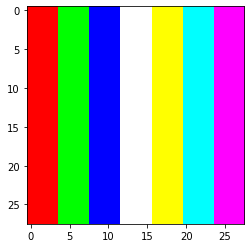

In [56]:
# Pour créer l'image voulue, il faut construire les plans R, G et B chacun seul puis les merge avec la fonction adéquate

# Matrice du plan R
r = [255, 255, 255, 255, 0, 0, 0,0 ,0,0,0,0,255, 255, 255, 255,255,255,255,255,0,0,0,0,255,255,255,255]    #Obtenu via la synthèse additive des couleurs
R = np.uint8(np.array([r for i in range(28)]))
R.shape

# Matrice du plan G
g = [0,0,0,0, 255,255,255,255, 0,0,0,0 ,255,255,255,255, 255,255,255,255, 255,255,255,255, 0,0,0,0]
G = np.uint8(np.array([g for i in range(28)]))
G.shape

# Matrice de plan B
b = [0,0,0,0, 0,0,0,0, 255,255,255,255 ,255,255,255,255, 0,0,0,0, 255,255,255,255, 255,255,255,255]
B = np.uint8(np.array([b for i in range(28)]))
B.shape



res=cv.merge([R,G,B])
plt.imshow(res) 
plt.show()


L'image est codée sur 24 bits, vu que chaque composante est codée sur 8 bits (le nombre de bits suffisant pour représenter toutes les nuances de couleurs ou de niveaux de gris qui sont perceptibles par l'oeil humain) et qu'on a 3 composantes; donc 8*3=24 bits par pixel. Il est à noter que quand on dit "Sur combien de bits est codée l'image" ça veut dire combien de bits est nécessaire pour coder un pixel.

**2/ Poids théorique:**

In [57]:
nb_cod=24
déf=28*28      #Définition de l'image
poids_th=(déf*nb_cod)/8       #Pour avoir le poids théorique en octets
print("Le poids théorique de l\'image est: ", poids_th, " octets")
print("Le poids théorique de l\'image est: ", poids_th/1024, " kilo octets")

Le poids théorique de l'image est:  2352.0  octets
Le poids théorique de l'image est:  2.296875  kilo octets


**3/ Enregistrement de l'image sous format .bmp:**

In [58]:
cv.imwrite('couleurs.bmp',res)
# Cette fonction retourne True quand est successfully enregistrée

True



* On remarque après téléchargement de l'image enregistrée que son poids est de **2.34 kilo octets**, ce qui est presque égal (un peu supérieur) au poids théorique; cette différence dans les poids est dûe aux mécanismes utilisés pour le PC pour stocker et procéder avec les images qui nécessitent souvent un espace de stockage supplémentaire.


# **Manipulation 3:**

1/ Visualisation de l'image:

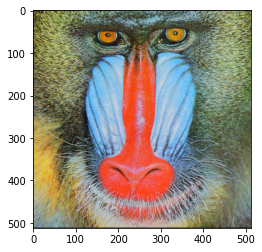

In [65]:
image=cv.imread('mandrill.png')
image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
# On met cv.COLOR_BGR2RGB puisque cv.imread stocke les canaux RGB dans l'ordre BGR, on met cet argument pour inverser l'ordre
plt.imshow(image)

2/ Taille et profondeur de l'image:

In [60]:
print('La profondeur de l\'image est: ', image.dtype)    #La profondeur d'une image c'est le nombre de couleurs présentatbles dans l'image (nb de bits)
# C'est la quantité d'information chromatique
print('La taille de l\'image est: ', image.shape)   #La taille de l'image c'est le nombre de canaux constituant sa couleur + ses dimensions
#La taille sous la forme (hauteur, largeur, nb de canaux)

La profondeur de l'image est:  uint8
La taille de l'image est:  (512, 512, 3)


3/ Type uint8:



* Les images sont de type uint8, ce qui veut dire que chaque canal est codé sur 8 bits non signés (impossibilité d'exprimer un signe négatif). Dans une image, un pixel négatif n'a aucun sens car l'information visuelle peut-être représentée via des pixels positifs donc c'est pour cela qu'on a choisi des entiers non-signés. On a choisi un nombre de bits égal à 8 car c'est suffisant pour représenter le nombre de nuances d'une seul couleur qu'un oeil humain peut observer (256 par couleur). En combinant toutes les possibilités données par les 24 bits par pixel; on peut représenter un peu moins de 17 millions de couleurs, un chiffre qui a été démontré scientifiquement d'être le maximum de la discernabilité de l'oeil humain.

4/ Séparation des canaux:

Text(0.5, 1.0, 'Canal Red')

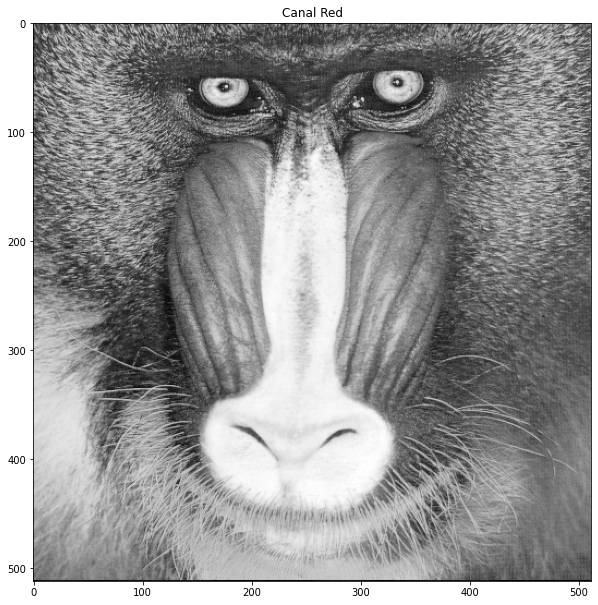

In [92]:
plt.figure(figsize=(10, 210))

# On procède à la séparation des canaux RGB

R,G,B=cv.split(image)

# Canal RED

plt.imshow(R, cmap='gray')
plt.title('Canal Red')

Text(0.5, 1.0, 'Canal Green')

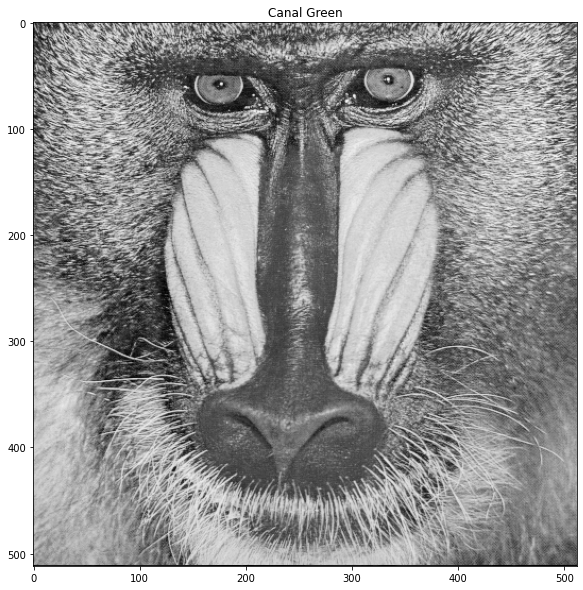

In [91]:
plt.figure(figsize=(10, 10))

# Canal GREEN

plt.imshow(G, cmap='gray')
plt.title('Canal Green')

Text(0.5, 1.0, 'Canal Blue')

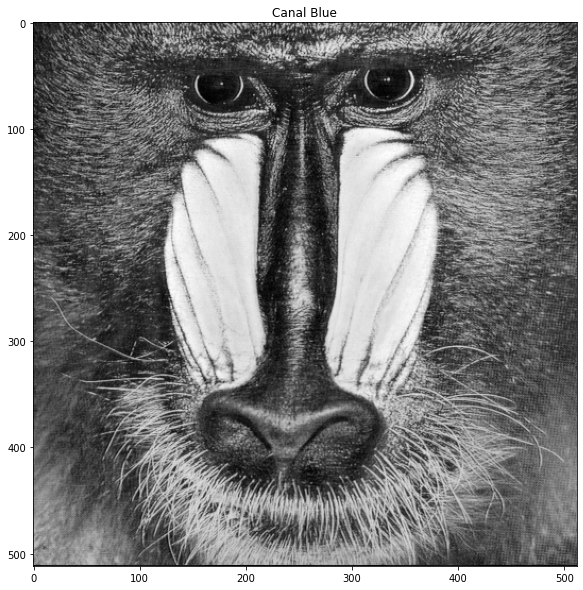

In [90]:
plt.figure(figsize=(10, 10))

# Canal BLUE

plt.imshow(B, cmap='gray')
plt.title('Canal Blue')

5/ Explication:

Les yeux du Mandrill apparaissent clairs (ayant une haute luminance) sur le canal du rouge, ils apparaissent moins clairs mais clairs quand même sur le canal Green; par contre sur le canal Blue il n'y a presque aucune luminance car c'est presque du noir. Il y a beaucoup de luminance dans le canal Rouge (presque saturé) et dans le canal vert car dans la synthèse additive le R+G donne du Jaune dans le cas de la saturation complète (ce qui veut dire que la composante bleue est nulle (luminance du noir)); si l'une des composantes n'est pas complètement saturée, ça donne des nuances du jaune (de l'orange en l'occurence). Dans le cas du Mandrill, sa couleur des yeux est parfaitement cohérente avec les principes de la synthèse additive; la composante rouge et verte sont plus ou moins présente mais la bleue est presque totalement absente; et donc ça donne la couleur Orange miel du Mandrill. La couleur des yeux sur les 3 canaux est cohérente avec les principes du système RGB.

6/ Interversion de toutes les possibilités:

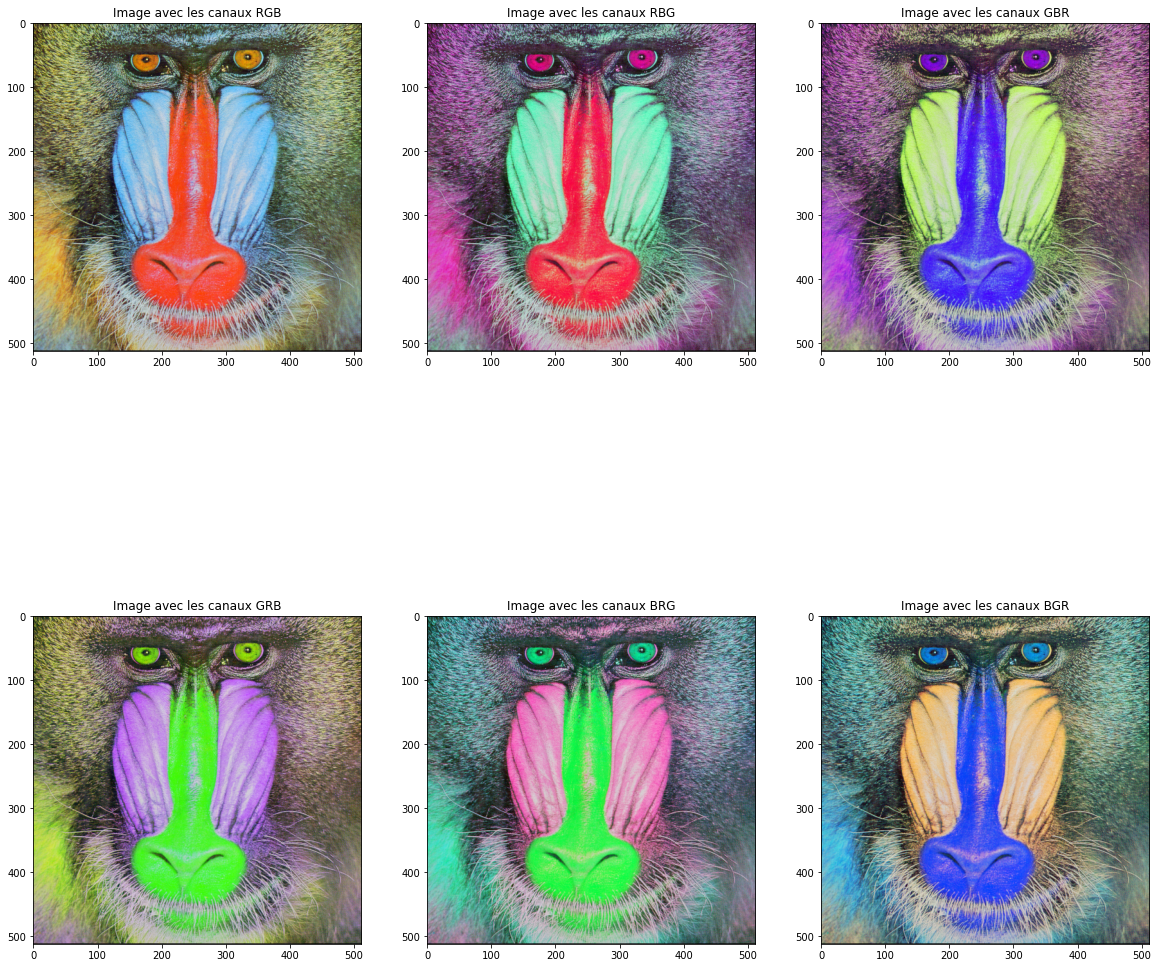

In [96]:
plt.figure(figsize=(20, 20))
canaux=cv.split(image)

#Il y a 6 possibilités d'interversion des 3 canaux

rgb_image=cv.merge([canaux[0], canaux[1], canaux[2]])
rbg_image=cv.merge([canaux[0], canaux[2], canaux[1]])
gbr_image=cv.merge([canaux[1], canaux[2], canaux[0]])
grb_image=cv.merge([canaux[1], canaux[0], canaux[2]])
brg_image=cv.merge([canaux[2], canaux[0], canaux[1]])
bgr_image=cv.merge([canaux[2], canaux[1], canaux[0]])

plt.subplot(2,3,1)
plt.imshow(rgb_image)
plt.title("Image avec les canaux RGB")

plt.subplot(2,3,2)
plt.imshow(rbg_image)
plt.title("Image avec les canaux RBG")

plt.subplot(2,3,3)
plt.imshow(gbr_image)
plt.title("Image avec les canaux GBR")

plt.subplot(2,3,4)
plt.imshow(grb_image)
plt.title("Image avec les canaux GRB")

plt.subplot(2,3,5)
plt.imshow(brg_image)
plt.title("Image avec les canaux BRG")

plt.subplot(2,3,6)
plt.imshow(bgr_image)
plt.title("Image avec les canaux BGR")

plt.show()

**Commentaire:** Le différentes images obtenues varient grandement en terme de couleurs après le merge, car dans le système RGB chaque canal est semblable à un niveau de gris et c'est la combinaison des différentes luminances de chaque couleur qui donne la couleur final après le merge; donc logiquement si on change l'ordre des canaux (ce qui veut dire qu'on a changé les intensités de chaque couleur vu que chaque canal est une image en niveaux de gris qui reflètenet les intensités); donc si les intensités sont changées, les couleurs le seront aussi vu que c'est ce qui définit une couleur. Il est à noter aussi que lors de l'exécution, il est attribué à chaque canal qui est en niveau de gris une intensité de la couleur du système RGB qui correspond à son ordre dans le merge, et à travers la synthèse additive on peut obtenir tous les différents résultats.

7/ Stockage des composantes:

In [95]:
# Exportation de chaque canal seul

cv.imwrite('Red.png', R)
cv.imwrite('Green.bmp', G)
cv.imwrite('Bleu.jpeg', B)

# On obtient un True comme sortie si l'export a été bien fait

True

8/ Poids théoriques et comparaison:

In [99]:
Poids_th_R=(image.shape[0]*image.shape[1]*8)/8
# On ultiplie fois 8 car chaque pixel est représenté par 8 bits, et on divise par 8 car on veut avoir le résultat en octets
print('Le poids théorique du canal Red est:', Poids_th_R, ' octets')
print('Le poids théorique du canal Red est:', Poids_th_R/1024, ' kilo octets\n')
Poids_th_G=(image.shape[0]*image.shape[1]*8)/8
print('Le poids théorique du canal Green est:', Poids_th_G, ' octets')
print('Le poids théorique du canal Green est:', Poids_th_G/1024, ' kilo octets\n')
Poids_th_B=(image.shape[0]*image.shape[1]*8)/8
print('Le poids théorique du canal Blue est:', Poids_th_B, ' octets')
print('Le poids théorique du canal Blue est:', Poids_th_B/1024, ' kilo octets')

Le poids théorique du canal Red est: 262144.0  octets
Le poids théorique du canal Red est: 256.0  kilo octets

Le poids théorique du canal Green est: 262144.0  octets
Le poids théorique du canal Green est: 256.0  kilo octets

Le poids théorique du canal Blue est: 262144.0  octets
Le poids théorique du canal Blue est: 256.0  kilo octets




* On remarque que pour le format .bmp le poids réel n'est pas du tout loin du poids théorique (il est juste légèrement supérieur dû aux données qui doivent être stockées avec l'image pour la bien gérer sur l'ordinateur); par contre pour les 2 autres formats (.jpeg et .png) il y a une large différence entre le poids réel et le poids théorique et ce est expliqué par le fait que les formats .jpeg et .png sont des formats avec compression: pour le .jpeg c'est un format de compression avec perte de données mais le .png est un format de compression sans perte de données, c'est donc pour cela qu'il y a une différence significative de poids entre .jpeg et .png sachant qu'ils sont tous les 2 loins du poids théorique puisqu'ils sont tous les 2 des formats avec compression.

9/ Passage en niveaux de gris:

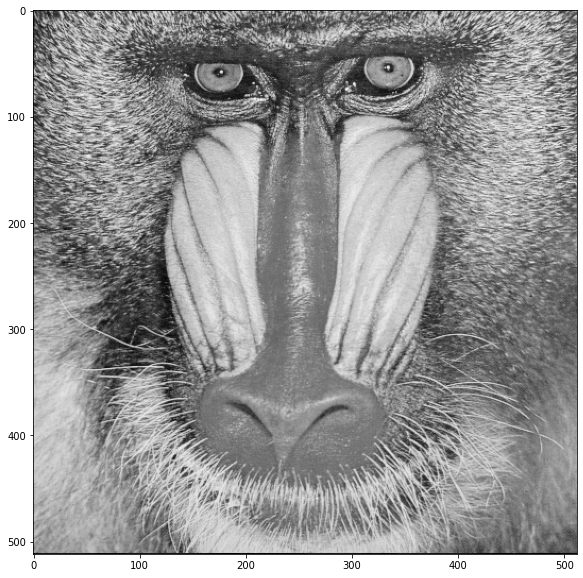

In [77]:
plt.figure(figsize=(10, 10))

# Multiplication par des coefficients spécifiques

gray=0.2126*R+0.7152*G+0.0722*B
plt.imshow(gray, cmap='gray')

10/ Passage en niveaux de gris par la fonction cvtColor():

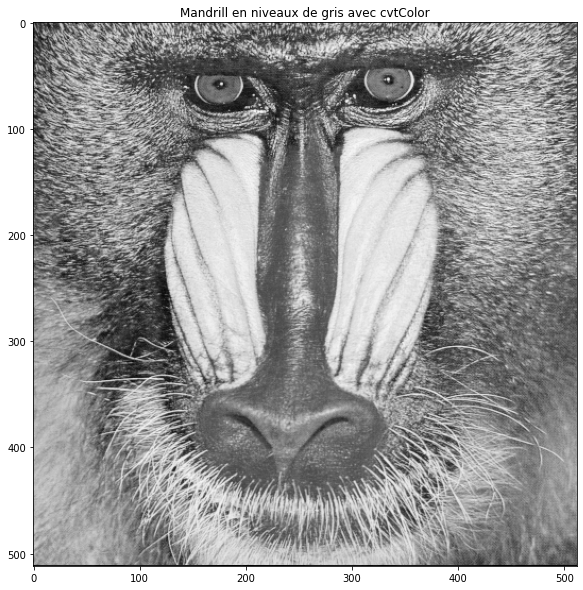

In [76]:
plt.figure(figsize=(10, 10))
image_gris=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.title('Mandrill en niveaux de gris avec cvtColor')
plt.imshow(image_gris, cmap='gray')

**Commentaire:** On remarque que non, les 2 transistions en niveaux de gris ne donnent pas le même résultat et ceci se remarque surtout dans la différence de contraste et de luminance entre les 2 images, celle fabriquée par cvtColor() est plus contrastée par rapport à la 1ère (ça se remarque surtout au niveau du nez du Mandrill); Ceci peut-être expliqué par le fait que la fonction cvtColor() utilise d'autes coefficients de transition que ceux qui ont été utilisés lors de la 1ère transistion. La différence entre les 2 images réside dans leurs contrastes respectifs.

# **Conclusion générale:**

Lors de cette manipulation, nous avons appris à manipuler les images numériques et les mécanismes de base d'implémentation des images dans le monde informatique. Nous avons appréhendé plusieurs notions, notamment celle de la représentation des couleurs, des formats, les compositions d'une image et d'une couleur. Nous avons aussi esquissé comment coder une couleur numériquement et certains détails de l'image comme par exemple comment la visualiser etc...
C'était une introduction à la manipulation des images numériques pour pouvoir après appréhender la programmation des différentes notions qui constituent le noyau du traitement d'images.